<h1 style="font-size: 36px ; font-weight: bold; font-style: italic;">Analise de dados - Queimadas Brasil</h1>
<hr style="border: 0; border-top: 1px solid black;"/>

<h1 ">Alunos: Luan Carlos, Felipe Steremberg, João Marcelo, Francisco, Lukas</h1>


<h1>O objetivo deste projeto é analisar os dados de queimadas/focos de incêndios no Brasil, que inclui as seguintes etapas:</h1>
<ol>
    <li><strong>Perguntas de Negócio</strong> (Compreensão do Negócio)</li>
    <li><strong>Tratamento, Exploração e Visualização de Dados</sttrong></li>
    <li><strong>Conclusões finais</strong></li>
    <li><strong>Analises Futuras</strong></li>
</ol>
</li>
</ol>


<h1 ">1. Perguntas de Negócio(Compreensão do Negócio)</h1>

<p>
    Neste projeto, o foco é analisar a situação das queimadas e desmatamentos no Brasil. A proposta é realizar uma análise detalhada e exploração dos dados, bem como desenvolver algoritmos e modelos de aprendizado de máquina. O objetivo é entender os dados coletados, identificar padrões, responder a perguntas e avaliar a capacidade de prever o risco de queimadas e desmatamento para datas futuras.
</p>

<h1>2.Tratamento, Exploração e Visualização de Dados</h1>

<h4>Primeiramente, vamos importar as bibliotecas necessárias para este projeto.</h4>

In [213]:
import pandas as pd    # Importa pandas para manipulação de dados
import numpy as np     # Importa numpy para operações numéricas e matrizes
import matplotlib.pyplot as plt   # Importa matplotlib para visualização de gráficos
import seaborn as sns  # Importa seaborn para gráficos estatísticos aprimorados

<h4>Importando o arquivo CSV</h4>

In [216]:
df_queimadashistoric = pd.read_csv('historico_pais_brasil.csv')

<h4>Observar o Dataset</h4>

In [219]:
df_queimadashistoric.head(10)

,Unnamed: 0,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,1998,NaN,NaN,NaN,NaN,NaN,3551.0,8067.0,35551.0,41976.0,23499.0,6804.0,4448.0,123896.0
1,1999,1081.0,1284.0,667.0,717.0,1811.0,3632.0,8758.0,39492.0,36914.0,27017.0,8863.0,4376.0,134612.0
2,2000,778.0,562.0,848.0,538.0,2097.0,6274.0,4740.0,22204.0,23293.0,27332.0,8399.0,4465.0,101530.0
3,2001,547.0,1060.0,1267.0,1081.0,2090.0,8405.0,6488.0,31838.0,39829.0,31039.0,15640.0,6200.0,145484.0
4,2002,1653.0,1569.0,1678.0,1683.0,3816.0,10845.0,18080.0,72412.0,93417.0,59257.0,39913.0,17091.0,321414.0
5,2003,6697.0,3099.0,3549.0,3643.0,6448.0,16752.0,30391.0,57004.0,97758.0,57495.0,35421.0,22980.0,341237.0
6,2004,3883.0,1932.0,2928.0,2956.0,6609.0,18024.0,30356.0,64067.0,121395.0,54292.0,45364.0,28639.0,380445.0
7,2005,7057.0,2898.0,2528.0,2743.0,5075.0,7854.0,30238.0,90729.0,102455.0,65023.0,31631.0,14332.0,362563.0
8,2006,4531.0,2387.0,2426.0,2269.0,4313.0,7601.0,17788.0,54630.0,76475.0,32043.0,29302.0,15414.0,249179.0
9,2007,4220.0,2761.0,3340.0,2550.0,5123.0,12716.0,19931.0,91085.0,141220.0,67228.0,31421.0,12320.0,393915.0


<h4>Aqui nós podemos ver o número de linhas e colunas do DataFrame.</h4>

In [222]:
df_queimadashistoric.shape

(30, 14)

<h4>Para nossa primeira analise presisaremos inicialmente das colunas de ano que esta como Unnamed: 0' e total, por isso vamos excluir colunas desnessesaria como as dos meses e as linhas 'Máximo, Média, Mínimo'</h4>

In [225]:
# Remove as linhas onde a coluna 'Unnamed: 0' contém "Máximo", "Média" ou "Mínimo"
df_queimadashistoric = df_queimadashistoric[~df_queimadashistoric['Unnamed: 0'].str.contains('Máximo|Média|Mínimo', na=False)]

In [227]:
# Selecionar as colunas de interesse (anos e total)
df_queimadashistoric = df_queimadashistoric[['Unnamed: 0', 'Total']]

In [229]:
# Renomear a coluna 'Unnamed: 0' para 'Ano' para facilitar o entendimento
df_queimadashistoric.rename(columns={'Unnamed: 0': 'Ano'}, inplace=True)

<h4>Vamos da uma olhada no dataset depois das modificações</h4>

In [232]:
df_queimadashistoric.head(10)

,Ano,Total
0,1998,123896.0
1,1999,134612.0
2,2000,101530.0
3,2001,145484.0
4,2002,321414.0
5,2003,341237.0
6,2004,380445.0
7,2005,362563.0
8,2006,249179.0
9,2007,393915.0


<h4>Agora vamos criar um grafico diacordo com as modificaçoes feitas no dataset </h4>

<h2>2.1. Grafico Historico queimadas Brasil 1998 - 2024 </h2>

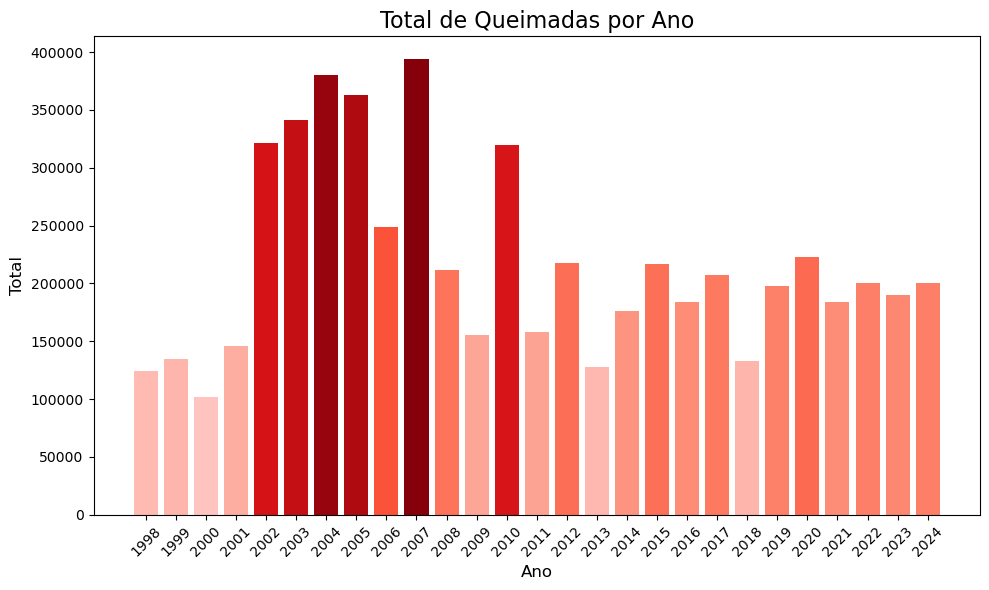

In [236]:
# Normalizar os totais para gerar cores
norm = plt.Normalize(df_queimadashistoric['Total'].min(), df_queimadashistoric['Total'].max())
colors = plt.cm.Reds(norm(df_queimadashistoric['Total']))

# Suavizar as cores utilizando uma interpolação
colors = [(r * 0.8 + 0.2, g * 0.8, b * 0.8) for r, g, b, a in colors]

# Criar o gráfico de barras vertical
plt.figure(figsize=(10, 6))
plt.bar(df_queimadashistoric['Ano'], df_queimadashistoric['Total'], color=colors)

# Adicionar título e rótulos aos eixos
plt.title('Total de Queimadas por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total', fontsize=12)

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [237]:
#Esse codigo  seleciona os dados dos anos com maior foco de queimada
anos_com_maior_total = df_queimadashistoric.sort_values(by='Total', ascending=False)
print(anos_com_maior_total.head(10))

     Ano     Total
9   2007  393915.0
6   2004  380445.0
7   2005  362563.0
5   2003  341237.0
4   2002  321414.0
12  2010  319383.0
8   2006  249179.0
22  2020  222797.0
14  2012  217234.0
17  2015  216778.0


<h2>2.2. Comparação entre o ano de maior queimada(2007) e 2024</h2>

<h6>Complemento da analise - Para fazermos agora uma analise comparando os anos de 2007 e 2024 presisaremos importar novamente o arquivo so que dessa vez colocando outro nome de variavel para representalo. Para assim fazermos um novo tratamento onde dessa vez selecionaremos os meses e o toltal de cada ano que ta sendo comparado.</h6>

In [242]:
#Importando o mesmo arquivo so que agora colocando como uma variavel diferente
df_queimadashistoricC = pd.read_csv('historico_pais_brasil.csv',)
# Renomear a coluna 'Unnamed: 0' para 'Ano'
df_queimadashistoricC.rename(columns={'Unnamed: 0': 'Ano'}, inplace=True)
# Converter a coluna 'Ano' para numérico
df_queimadashistoricC['Ano'] = pd.to_numeric(df_queimadashistoricC['Ano'], errors='coerce')

In [244]:
# Filtrar os dados para os anos de 2007 e 2024
dados_2007 = df_queimadashistoricC[df_queimadashistoricC['Ano'] == 2007].iloc[:, 1:-1]  # Ignorar 'Ano' e 'Total'
dados_2024 = df_queimadashistoricC[df_queimadashistoricC['Ano'] == 2024].iloc[:, 1:-1]  # Ignorar 'Ano' e 'Total'

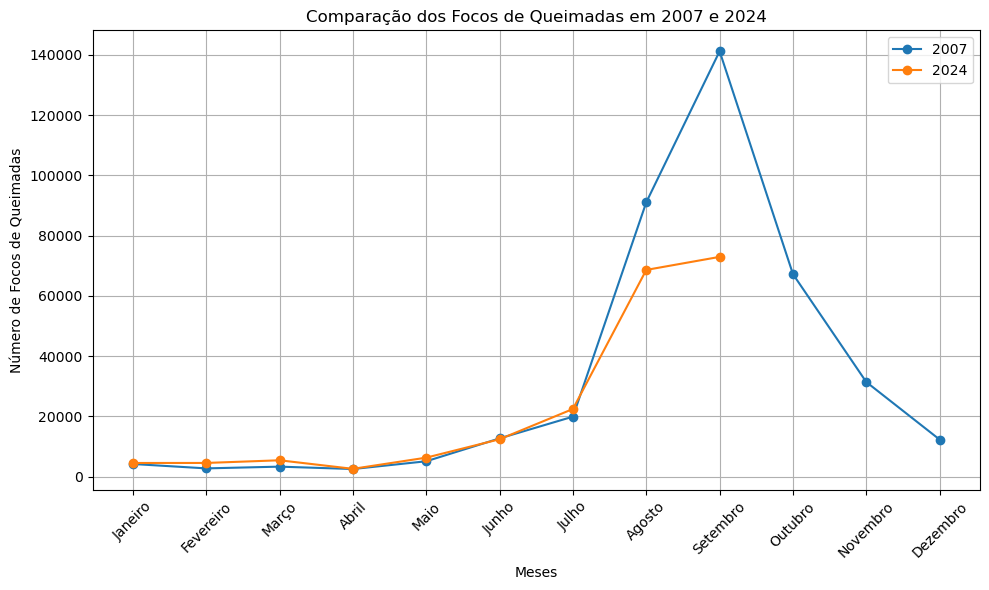

In [246]:
#Grafico Linha para representar a comparação dos anos de 2007 e 2024
plt.figure(figsize=(10, 6))
plt.plot(dados_2007.columns, dados_2007.values.flatten(), label='2007', marker='o')
plt.plot(dados_2024.columns, dados_2024.values.flatten(), label='2024', marker='o')
plt.title('Comparação dos Focos de Queimadas em 2007 e 2024')
plt.xlabel('Meses')
plt.ylabel('Número de Focos de Queimadas')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [247]:
#Mostrar dados dos anos de 2007 e 2024
print("Dados 2007:\n", dados_2007)
print("Dados 2024:\n", dados_2024)

Dados 2007:
    Janeiro  Fevereiro   Março   Abril    Maio    Junho    Julho   Agosto  \
9   4220.0     2761.0  3340.0  2550.0  5123.0  12716.0  19931.0  91085.0   

   Setembro  Outubro  Novembro  Dezembro  
9  141220.0  67228.0   31421.0   12320.0  
Dados 2024:
     Janeiro  Fevereiro   Março   Abril    Maio    Junho    Julho   Agosto  \
26   4555.0     4566.0  5448.0  2613.0  6324.0  12432.0  22478.0  68635.0   

    Setembro  Outubro  Novembro  Dezembro  
26   72962.0      NaN       NaN       NaN  


<h2>2.3. Conclusão</h2>

 <h3>2.3.1. Tendência Geral</h3>
    <p>
        Os dados indicam um aumento significativo nos focos de queimadas nos primeiros meses de 2024 em comparação com 2007, exceto para agosto e setembro, que mostraram uma queda drástica.
        O total acumulado para 2007 é muito maior do que o total disponível para 2024 até o momento, mas é importante notar que os dados de outubro a dezembro de 2024 ainda não estão disponíveis.
    </p>
    <h3>2.3.2. Análise de sazonalidade</h3>
    <p>
        Observando o aumento no número de queimadas nos meses de janeiro a julho, é importante investigar se esses padrões se mantêm nos meses finais do ano.
    </p>
    <h3>2.3.3. Impacto de políticas ambientais</h3>
    <p>
        Considerar se houve mudanças nas políticas de controle de queimadas entre 2007 e 2024 que possam ter influenciado esses números.
    </p>
    <h3>2.3.4. Mudanças climáticas</h3>
    <p>
        As condições climáticas e fatores como a quantidade de chuvas podem ter um papel significativo nas queimadas. Uma análise sobre a relação entre clima e focos de queimadas poderia ser útil.
    </p>


<h2>2.4. Focos de Queimadas e sua relação clima 2024</h2>

In [253]:
#Importando o arquivo CSV
df_queimadas = pd.read_csv('FocosQueimadasINPE.csv')

In [255]:
df_queimadas.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2024/09/15 17:05:00,AQUA_M-T,Brasil,RIO DE JANEIRO,RESENDE,Mata Atlântica,20,0.10,1.00,-22.47890,-44.43192,10.0
1,2024/09/15 17:05:00,AQUA_M-T,Brasil,RIO DE JANEIRO,BARRA MANSA,Mata Atlântica,20,0.16,0.98,-22.43931,-44.18486,18.8
2,2024/09/15 17:05:00,AQUA_M-T,Brasil,RIO DE JANEIRO,PETRÓPOLIS,Mata Atlântica,20,0.00,-999.00,-22.36515,-43.13107,12.1
3,2024/09/15 17:05:00,AQUA_M-T,Brasil,RIO DE JANEIRO,VALENÇA,Mata Atlântica,19,0.53,1.00,-22.29778,-43.63344,10.7
4,2024/09/15 17:05:00,AQUA_M-T,Brasil,SÃO PAULO,MOGI GUAÇU,Cerrado,21,0.10,1.00,-22.28681,-46.82899,31.9


<h4>Avaliar e tratar o novo arquivo selecionado</h4>

In [258]:
df_queimadas.shape

(1795, 12)

<h6>Como esse arquivo é bem maior que o ultimo sera nescessario fazer algumas analises específicas</h6>

<h4>Verifica se há linhas duplicadas no DataFrame</h4>

In [262]:
df_queimadas.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [264]:
# Conta o número total de linhas duplicadas no DataFrame 'df_queimadas'
sum(df_queimadas.duplicated())

0

<h4>Verificar se a valores nulos no DataFrame</h4>

In [267]:
df_queimadas.isnull().sum()

DataHora        0
Satelite        0
Pais            0
Estado          0
Municipio       0
Bioma           0
DiaSemChuva     0
Precipitacao    0
RiscoFogo       0
Latitude        0
Longitude       0
FRP             0
dtype: int64

<h2> 2.5. Gráfico de barras vertical - Focos por bioma - 2024</h2>

<h4>Nesse DataFrame cada linha representa um registro de ocorrência de queimadas, por isso os gráficos onde mostra focos especificos estão sendo criados como countplots, que por padrão, conta quantas vezes cada categoria (neste caso, cada bioma) aparece no DataFrame.</h4>

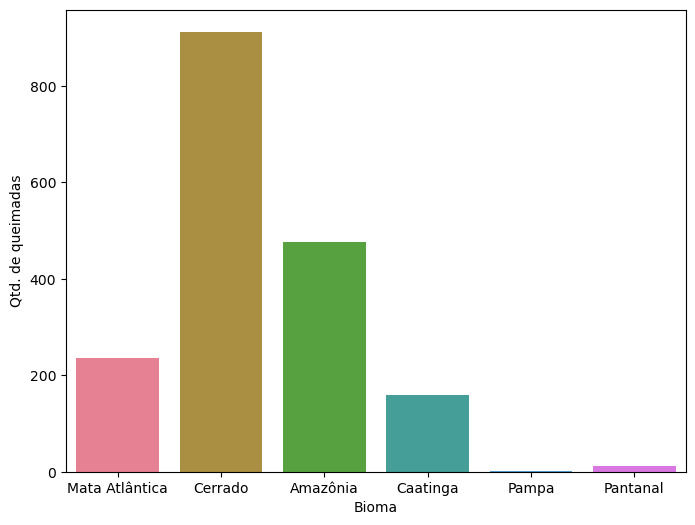

In [271]:
paleta_cores = sns.color_palette("husl", len(df_queimadas['Bioma'].unique()))
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Bioma', data=df_queimadas, palette=paleta_cores, hue='Bioma')
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.legend([], [], frameon=False)  
plt.show()

<h2>2.6. Grafico linha - Relação de dias sem chuvas com os biomas - 2024</h2>

<h4>Este gráfico de linha mostra a média de dias sem chuva em diferentes biomas. Ele agrupa os dados por bioma, calcula a média de dias sem precipitação para cada um, e depois exibe esses valores em um gráfico. O objetivo é visualizar a relação entre os biomas e o número médio de dias sem chuva, permitindo identificar quais biomas experimentam períodos mais longos ou curtos de seca.</h4>

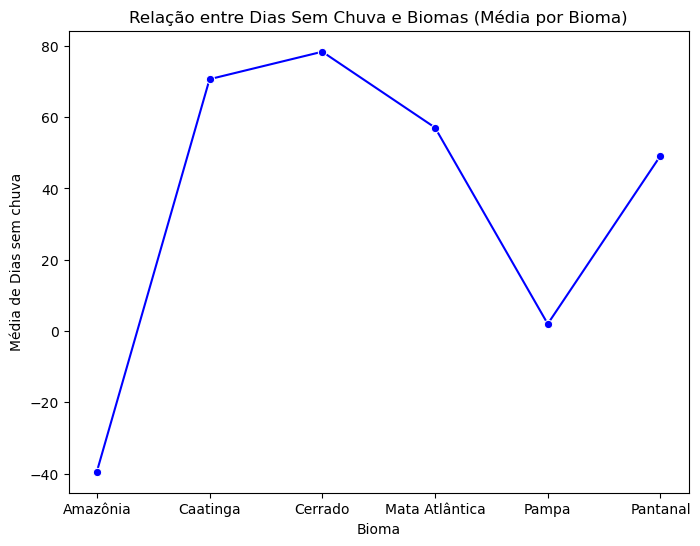

In [275]:
# Substitui vírgulas por pontos na coluna 'DiaSemChuva' e converte para tipo float
df_queimadas['DiaSemChuva'] = df_queimadas['DiaSemChuva'].replace(',', '.', regex=True).astype(float)
# Agrupa os dados por 'Bioma' e calcula a média da coluna 'DiaSemChuva' para cada bioma
df_mean_dias_sem_chuva = df_queimadas.groupby('Bioma')['DiaSemChuva'].mean().reset_index()
# A função groupby('Bioma') agrupa o DataFrame pelos biomas, e o mean() calcula a média dos valores de 'DiaSemChuva' dentro de cada bioma
# Cria uma figura com tamanho 8x6 polegadas
plt.figure(figsize=(8,6))
# Cria um gráfico de linha mostrando a relação entre Bioma e a média de dias sem chuva, com marcadores circulares ('o') e cor azul
sns.lineplot(x='Bioma', y='DiaSemChuva', data=df_mean_dias_sem_chuva, marker='o', color='b')
# Define o rótulo do eixo X como 'Bioma'
plt.xlabel('Bioma')
# Define o rótulo do eixo Y como 'Média de Dias sem chuva'
plt.ylabel('Média de Dias sem chuva')
# Define o título do gráfico
plt.title('Relação entre Dias Sem Chuva e Biomas (Média por Bioma)')
# Exibe o gráfico
plt.show()

In [276]:
biomas_dias_sem_chuva = df_queimadas.groupby('Bioma')['DiaSemChuva'].sum().sort_values(ascending=False)
biomas_dias_sem_chuva.head(6)

Bioma
Cerrado           71456.0
Mata Atlântica    13411.0
Caatinga          11233.0
Pantanal            541.0
Pampa                 4.0
Amazônia         -18785.0
Name: DiaSemChuva, dtype: float64

<h2>2.7. Grafico linha/Barras Relação entre Focos de Queimadas e Média de Dias Sem Chuva por Bioma</h2>

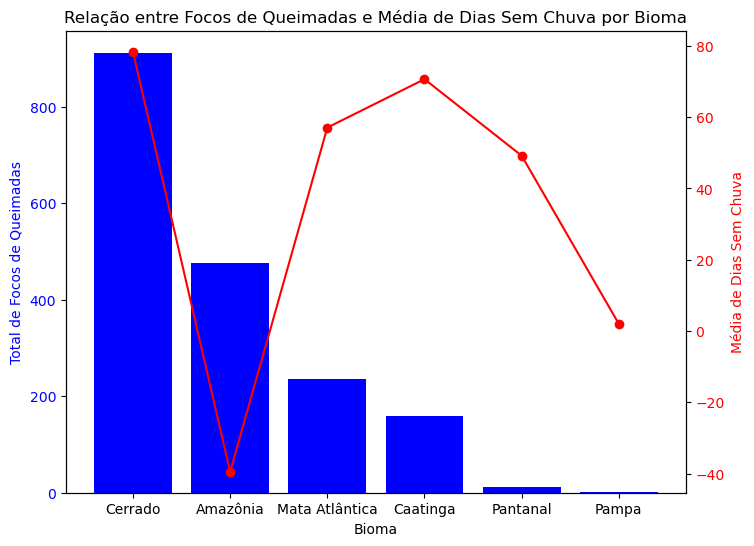

In [280]:
bioma_dias_focos = df_queimadas.groupby('Bioma').agg(
    media_dias_sem_chuva=('DiaSemChuva', 'mean'),  
    total_focos=('Bioma', 'count')  
).sort_values(by='total_focos', ascending=False)
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.bar(bioma_dias_focos.index, bioma_dias_focos['total_focos'], color='b', label='Total de Focos de Queimadas')
ax1.set_xlabel('Bioma')
ax1.set_ylabel('Total de Focos de Queimadas', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2 = ax1.twinx()
ax2.plot(bioma_dias_focos.index, bioma_dias_focos['media_dias_sem_chuva'], color='r', marker='o', label='Média de Dias Sem Chuva')
ax2.set_ylabel('Média de Dias Sem Chuva', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Relação entre Focos de Queimadas e Média de Dias Sem Chuva por Bioma')
plt.show()

<h2>2.8. Conclusão</h2>
    <p>
        Em geral, a relação entre dias sem chuva e focos de queimadas varia bastante entre os biomas:
    </p>
    <ul>
        <li><strong>Cerrado</strong> apresenta uma forte correlação positiva, com um alto número de focos de queimadas associado a um grande número de dias sem chuva.</li>
        <li><strong>Amazônia</strong> tem um comportamento atípico devido ao valor negativo de dias sem chuva, o que pode indicar problemas de qualidade de dados ou que outras variáveis têm um impacto maior nas queimadas.</li>
        <li>Outros biomas, como <strong>Mata Atlântica</strong> e <strong>Caatinga</strong>, mostram uma correlação moderada, enquanto <strong>Pantanal</strong> e <strong>Pampa</strong> têm uma menor correlação, possivelmente devido a fatores ambientais específicos que limitam a ocorrência de queimadas.</li>
    </ul>
    <p>
        A relação entre dias sem chuva e focos de queimadas pode ser complexa e influenciada por uma combinação de fatores climáticos, ambientais e humanos.
    </p>

<h2>2.9. Gráfico de barras horizontal - Focos por Estado - 2024</h2>

In [284]:
estado_queimadas = df_queimadas.groupby('Estado')['Estado'].count().sort_values(ascending=False)

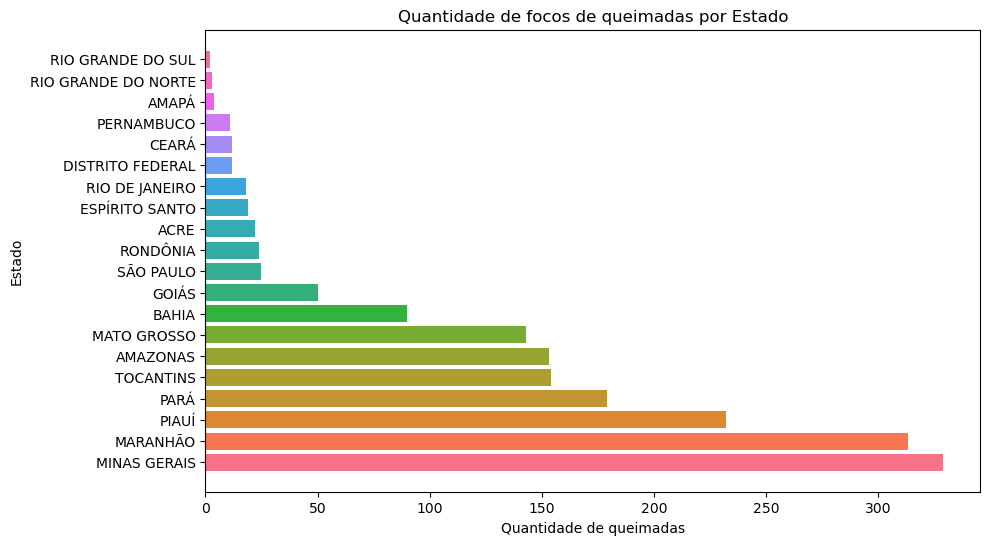

In [286]:
paleta_cores = sns.color_palette("husl", len(estado_queimadas))
plt.figure(figsize=(10,6))
bars = plt.barh(estado_queimadas.index, estado_queimadas.values, color=paleta_cores)
plt.xlabel('Quantidade de queimadas')
plt.ylabel('Estado')
plt.title('Quantidade de focos de queimadas por Estado')
plt.show()

In [287]:
biomasCasos = df_queimadas.groupby('Estado')['Estado'].count().sort_values(ascending=False)
biomasCasos.head(5)

Estado
MINAS GERAIS    329
MARANHÃO        313
PIAUÍ           232
PARÁ            179
TOCANTINS       154
Name: Estado, dtype: int64

<h2>2.10. Grafico linha - Relação de dias sem chuvas com os Estados</h2>

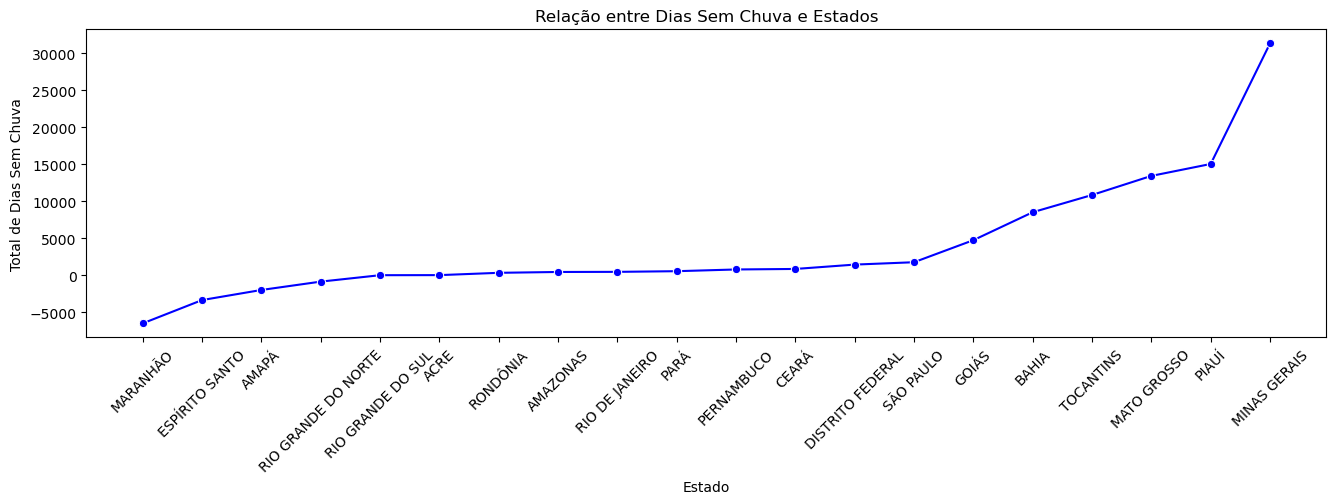

In [291]:
dias_sem_chuva_estado = df_queimadas.groupby('Estado')['DiaSemChuva'].sum().sort_values()
plt.figure(figsize=(16, 4))
sns.lineplot(x=dias_sem_chuva_estado.index, y=dias_sem_chuva_estado.values, marker='o', color='b')
plt.xlabel('Estado')
plt.ylabel('Total de Dias Sem Chuva')
plt.title('Relação entre Dias Sem Chuva e Estados')
plt.xticks(rotation=45)
plt.show()

In [292]:
biomas_dias_sem_chuva = df_queimadas.groupby('Estado')['DiaSemChuva'].sum().sort_values(ascending=False)
biomas_dias_sem_chuva.head(5)

Estado
MINAS GERAIS    31369.0
PIAUÍ           15051.0
MATO GROSSO     13438.0
TOCANTINS       10854.0
BAHIA            8522.0
Name: DiaSemChuva, dtype: float64

<h2>2.11. Conclusão</h2>
    <p>A relação entre dias sem chuva e a quantidade de focos de queimadas nos estados brasileiros sugere que a seca prolongada contribui para o aumento das queimadas. No entanto, variações regionais e comportamentos atípicos indicam que outros fatores, como práticas agrícolas, políticas de manejo e características ambientais locais, também desempenham um papel significativo. Analisar esses dados pode ajudar a entender melhor os padrões de queimadas e a desenvolver estratégias mais eficazes para prevenção e controle.</p>

<h2>2.12. Gráfico bolha - Focos por munipios - 2024</h2>

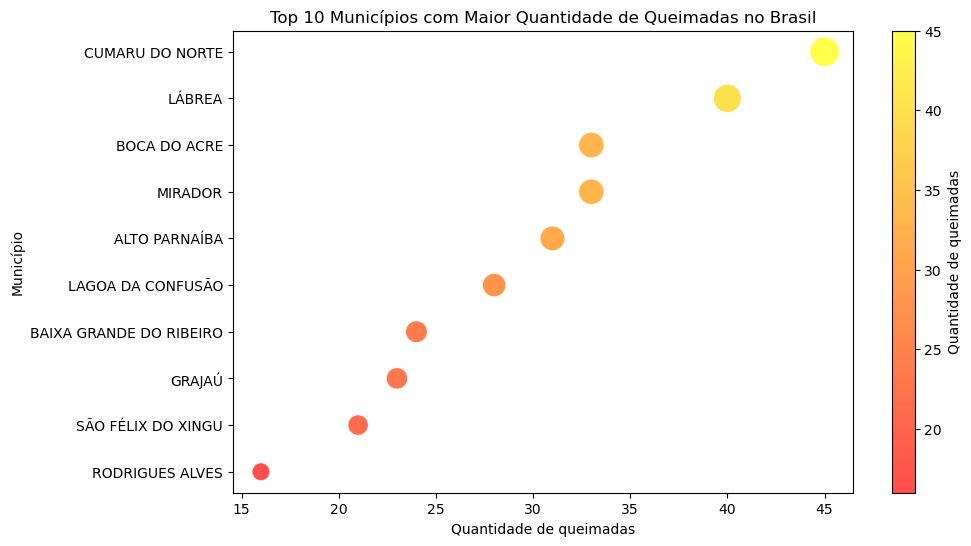

In [297]:
municipio_queimadas = df_queimadas.groupby('Municipio')['Municipio'].count().sort_values(ascending=False)
top_municipios_queimadas = municipio_queimadas.head(10)
top_municipios_queimadas = top_municipios_queimadas.sort_values(ascending=True)
plt.figure(figsize=(10,6))
cmap = sns.color_palette("autumn", as_cmap=True)
norm = plt.Normalize(top_municipios_queimadas.min(), top_municipios_queimadas.max())
colors = cmap(norm(top_municipios_queimadas.values))
plt.scatter(top_municipios_queimadas.values, top_municipios_queimadas.index,
            s=top_municipios_queimadas.values * 10, c=top_municipios_queimadas.values, cmap='autumn', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.xlabel('Quantidade de queimadas')
plt.ylabel('Município')
plt.title('Top 10 Municípios com Maior Quantidade de Queimadas no Brasil')
plt.colorbar(label='Quantidade de queimadas')
plt.show()

In [298]:
biomasCasos = df_queimadas.groupby('Municipio')['Municipio'].count().sort_values(ascending=False)
biomasCasos.head(5)

Municipio
CUMARU DO NORTE    45
LÁBREA             40
MIRADOR            33
BOCA DO ACRE       33
ALTO PARNAÍBA      31
Name: Municipio, dtype: int64

<h2>2.13. Relação de dias sem chuvas com os Municipios</h2>

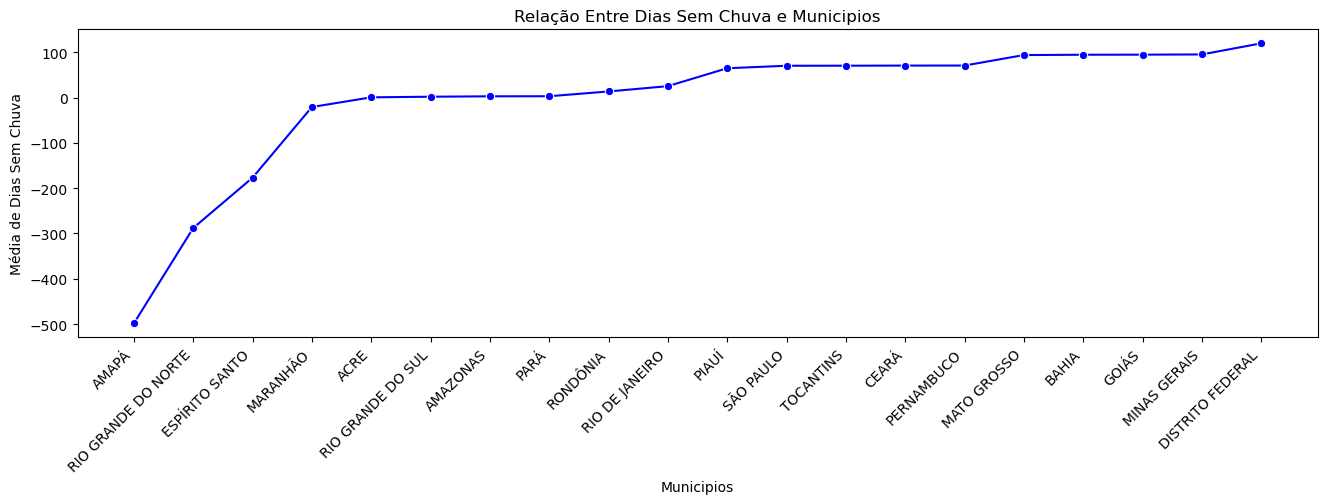

In [302]:
estado_stats = df_queimadas.groupby('Estado').agg(
    media_dias_sem_chuva=('DiaSemChuva', 'mean')
).reset_index()
estado_stats = estado_stats.sort_values(by='media_dias_sem_chuva')
plt.figure(figsize=(16, 4))
sns.lineplot(x='Estado', y='media_dias_sem_chuva', data=estado_stats, marker='o', color='blue')
plt.xlabel('Municipios')
plt.ylabel('Média de Dias Sem Chuva')
plt.title('Relação Entre Dias Sem Chuva e Municipios')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [303]:
biomasCasos = df_queimadas.groupby('Municipio')['DiaSemChuva'].count().sort_values(ascending=False)
biomasCasos.head(5)

Municipio
CUMARU DO NORTE    45
LÁBREA             40
MIRADOR            33
BOCA DO ACRE       33
ALTO PARNAÍBA      31
Name: DiaSemChuva, dtype: int64

<h2>2.14. Conclusão</h2>
    <p>A relação entre dias sem chuva e a quantidade de focos de queimadas nos municípios analisados mostra uma correlação direta. Em geral, mais dias sem chuva estão associados a um maior número de queimadas. Essa relação reforça a importância de monitorar as condições climáticas, especialmente a precipitação, como um indicador importante para a gestão e prevenção de queimadas.</p>